Epoch 1/20


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0067
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 4.1568e-04
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 4.0079e-04
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 3.3806e-04
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 3.1943e-04
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 3.4540e-04
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 2.8148e-04
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 3.3003e-04
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 3.0663e-04
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 2.5522e-04
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 2.2929e-04
Epoch 12/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 2.8167e-04
Epoch 13/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 2.5175e-04
Epoch 14/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 2.0166e-04
Ep

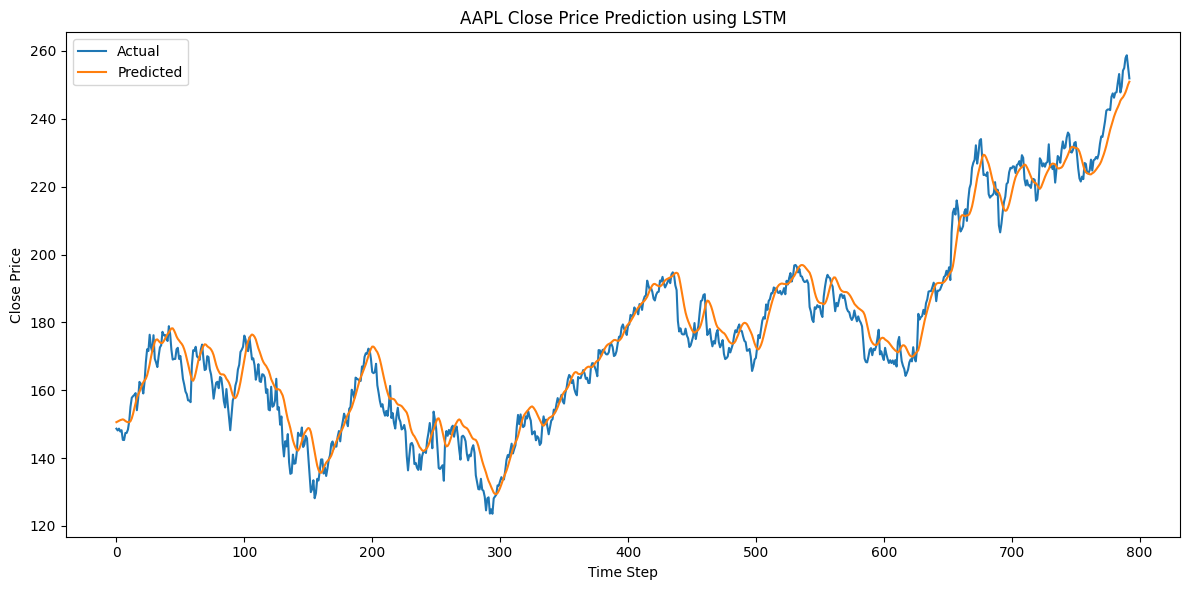

In [2]:
# pip install pandas numpy matplotlib scikit-learn tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# === Load Data ===
df = pd.read_csv("stock_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Ticker'] == 'AAPL'].copy()
df.sort_values('Date', inplace=True)

# === Prepare Target Data ===
data = df[['Close_Price']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# === Create Sequences ===
look_back = 60
X, y = [], []
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)

# === Reshape for LSTM ===
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# === Train/Test Split ===
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# === Build Model ===
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# === Compile & Train ===
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)

# === Predict & Evaluate ===
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

# === Plot ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.title("AAPL Close Price Prediction using LSTM")
plt.xlabel("Time Step")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()


Epoch 1/25


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0059
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 9.0986e-04
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 5.7050e-04
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 4.7983e-04
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 3.8765e-04
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 4.2200e-04
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 4.2660e-04
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 5.7100e-04
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 2.9414e-04
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 3.3439e-04
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 3.0675e-04
Epoch 12/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 2.7007e-04
Epoch 13/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 2.6915e-04
Epoch 14/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 2.5445e-04
Ep

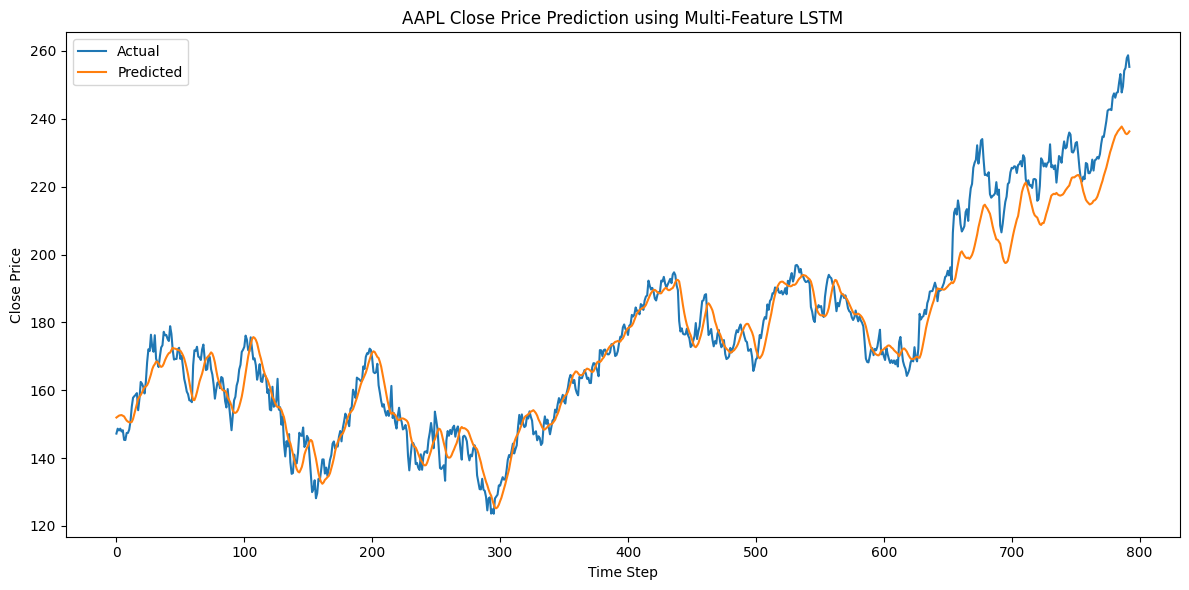

In [6]:
# pip install pandas numpy matplotlib scikit-learn tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout

# === Load and Filter Dataset ===
df = pd.read_csv("stock_data.csv")
df['Date'] = pd.to_datetime(df['Date'])

# You can loop through multiple tickers here if needed
ticker = 'AAPL'
df = df[df['Ticker'] == ticker].copy()
df.sort_values('Date', inplace=True)

# === Multi-Feature Selection ===
features = ['Close_Price', 'Volume', 'RSI', 'MACD', 'MACD_Signal', 'ATR_14', 'Sentiment_Score', 'Price_Momentum']
data = df[features].values

# === Normalize ===
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# === Create Sequences ===
look_back = 60
forecast_horizon = 1  # change to 5 for seq2seq
X, y = [], []
for i in range(look_back, len(scaled_data) - forecast_horizon):
    X.append(scaled_data[i - look_back:i])
    y.append(scaled_data[i:i + forecast_horizon, 0])  # Close_Price
X, y = np.array(X), np.array(y)

# If forecast_horizon = 1, reshape y
if forecast_horizon == 1:
    y = y.reshape(-1)

# === Train/Test Split ===
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# === Build LSTM Model ===
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=forecast_horizon))

# === Compile and Train ===
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=25, batch_size=32)

# === Predict ===
y_pred = model.predict(X_test)

# === Rescale Back ===
y_pred_rescaled = scaler.inverse_transform(
    np.hstack([y_pred, np.zeros((y_pred.shape[0], scaled_data.shape[1]-1))]))[:, 0]
y_test_rescaled = scaler.inverse_transform(
    np.hstack([y_test.reshape(-1, forecast_horizon), np.zeros((y_test.shape[0], scaled_data.shape[1]-1))]))[:, 0]

# === Evaluate ===
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
r2 = r2_score(y_test_rescaled, y_pred_rescaled)
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

# === Plot ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.title(f"{ticker} Close Price Prediction using Multi-Feature LSTM")
plt.xlabel("Time Step")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()

# === Save the Model ===
model.save(f"lstm_{ticker.lower()}.h5")

In [8]:
# pip install pandas numpy matplotlib scikit-learn tensorflow streamlit

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout

# === Load Dataset ===
df = pd.read_csv("stock_data.csv")
df['Date'] = pd.to_datetime(df['Date'])

# === Settings ===
look_back = 60
forecast_horizon = 5  # predict next 5 days
features = ['Close_Price', 'Volume', 'RSI', 'MACD', 'MACD_Signal', 'ATR_14', 'Sentiment_Score', 'Price_Momentum']
tickers = df['Ticker'].unique()

# === Directory for saving models ===
os.makedirs("saved_models", exist_ok=True)

# === Evaluation log ===
eval_results = []

for ticker in tickers:
    print(f"Training model for {ticker}...")
    df_ticker = df[df['Ticker'] == ticker].copy().sort_values('Date')
    data = df_ticker[features].values

    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)

    X, y = [], []
    for i in range(look_back, len(scaled_data) - forecast_horizon):
        X.append(scaled_data[i - look_back:i])
        y.append(scaled_data[i:i + forecast_horizon, 0])
    X, y = np.array(X), np.array(y)

    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(forecast_horizon)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

    y_pred = model.predict(X_test)

    # === Properly reshape for inverse transform ===
    num_features = scaled_data.shape[1]
    y_pred_padded = np.hstack([y_pred, np.zeros((y_pred.shape[0], num_features - y_pred.shape[1]))])
    y_test_padded = np.hstack([y_test, np.zeros((y_test.shape[0], num_features - y_test.shape[1]))])

    y_pred_rescaled = scaler.inverse_transform(y_pred_padded)[:, 0]
    y_test_rescaled = scaler.inverse_transform(y_test_padded)[:, 0]

    mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
    rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
    r2 = r2_score(y_test_rescaled, y_pred_rescaled)

    eval_results.append({"Ticker": ticker, "MAE": mae, "RMSE": rmse, "R2": r2})

    # Save model
    model.save(f"saved_models/lstm_{ticker}.h5")

    # Plot sample
    plt.figure(figsize=(10, 4))
    plt.plot(y_test_rescaled, label='Actual')
    plt.plot(y_pred_rescaled, label='Predicted')
    plt.title(f"{ticker} - LSTM Forecast (Next {forecast_horizon} Days)")
    plt.xlabel("Time Step")
    plt.ylabel("Close Price")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"saved_models/{ticker}_forecast_plot.png")
    plt.close()

# === Save Evaluation Summary ===
pd.DataFrame(eval_results).to_csv("saved_models/model_evaluation_summary.csv", index=False)
print("All models trained and saved successfully!")


Training model for AAPL...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


Training model for MSFT...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step


Training model for GOOGL...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


Training model for NVDA...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


Training model for META...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


Training model for TSLA...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


Training model for JPM...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


Training model for GS...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


Training model for BAC...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


Training model for C...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


Training model for JNJ...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


Training model for PFE...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step


Training model for UNH...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


Training model for AMZN...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


Training model for WMT...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


Training model for COST...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


Training model for GM...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


Training model for F...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


Training model for RIVN...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


Training model for XOM...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


Training model for CVX...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


Training model for ENB...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


Training model for NFLX...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


Training model for DIS...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


Training model for KO...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


Training model for PG...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


Training model for AMT...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


Training model for MNST...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


Training model for CTSH...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


Training model for QCOM...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


Training model for ORCL...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


Training model for FTNT...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


Training model for INTC...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


Training model for YUM...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


Training model for DPZ...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


Training model for MANH...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


Training model for CSCO...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


Training model for ILMN...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


Training model for V...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


Training model for MA...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


All models trained and saved successfully!


In [2]:
# === IMPORTS ===
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from datetime import timedelta
import matplotlib.pyplot as plt

# === LOAD AND PREPROCESS DATA ===
df = pd.read_csv('stock_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(['Date', 'Ticker'], inplace=True)
df.fillna(method='ffill', inplace=True)

# === FEATURE SELECTION ===
features = ['Open', 'High', 'Low', 'Volume', 'Close_Price']
data = df[features]
numeric_data = data.select_dtypes(include=['float64', 'int64'])
numeric_data.fillna(numeric_data.mean(), inplace=True)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numeric_data)

# === SEQUENCE GENERATION ===
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step])
        y.append(data[i+time_step, -1])  # Target = Close
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data)

# === TRAIN TEST SPLIT ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# === LSTM MODEL ===
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))  # Predicting Close price
model.compile(optimizer='adam', loss='mean_squared_error')

# === TRAIN MODEL ===
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64, callbacks=[EarlyStopping(patience=5)])
model.save('market_scenario_lstm_model.h5')

# === PREDICT AND EVALUATE ===
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(np.hstack((np.zeros((predicted_price.shape[0], 4)), predicted_price)))[:, -1]
actual_price = scaler.inverse_transform(np.hstack((np.zeros((y_test.shape[0], 4)), y_test.reshape(-1, 1))))[:, -1]

print("Predicted Prices:", predicted_price[:5])
print("Actual Prices:", actual_price[:5])

# === FORECAST FUTURE PRICES FUNCTION ===
def predict_future_prices(ticker, days=30, time_step=60):
    try:
        model = load_model('market_scenario_lstm_model.h5')
        df = pd.read_csv('stock_data.csv')
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index(['Date', 'Ticker'], inplace=True)

        if ticker not in df.index.get_level_values('Ticker'):
            raise ValueError(f"Ticker '{ticker}' not found in the dataset.")

        ticker_df = df.xs(ticker, level='Ticker')
        ticker_df = ticker_df.ffill()
        features = ['Open', 'High', 'Low', 'Volume', 'Close_Price']
        data = ticker_df[features]

        numeric_data = data.select_dtypes(include=['float64', 'int64'])
        numeric_data = numeric_data.apply(pd.to_numeric, errors='coerce')
        numeric_data.fillna(numeric_data.mean(), inplace=True)

        if np.isnan(numeric_data).any().any():
            raise ValueError("NaN values found in numeric_data.")
        if np.isinf(numeric_data).any().any():
            raise ValueError("Infinite values found in numeric_data.")

        if len(ticker_df) < time_step:
            raise ValueError(f"Not enough data rows for the ticker '{ticker}'")

        numeric_data = numeric_data.astype('float32')
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scaler.fit_transform(numeric_data)

        if scaled_data.shape[0] < time_step:
            raise ValueError(f"Not enough data for {ticker}. Need at least {time_step} days.")

        last_time_step_days = scaled_data[-time_step:]
        X_input = np.array([last_time_step_days])

        predictions = []
        for _ in range(days):
            prediction = model.predict(X_input)
            predictions.append(prediction[0, 0])
            X_input = np.append(X_input[:, 1:, :], [[prediction]], axis=1)

        predicted_prices = scaler.inverse_transform(
            np.hstack((np.zeros((days, 4)), np.array(predictions).reshape(-1, 1)))
        )[:, -1]

        last_date = ticker_df.index[-1]
        future_dates = [last_date + timedelta(days=i) for i in range(1, days + 1)]
        predictions_df = pd.DataFrame({'Date': future_dates, 'Predicted_Close': predicted_prices})

        print(f"Predictions for {ticker} for the next {days} days:")
        print(predictions_df)

        return predictions_df

    except Exception as e:
        print(f"Error predicting prices for {ticker}: {e}")
        return None


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22768\2281122287.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 166s 84ms/step - loss: 5.2189e-04 - val_loss: 4.7368e-05
Epoch 2/50
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 175s 70ms/step - loss: 1.7443e-04 - val_loss: 8.4042e-05
Epoch 3/50
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 120s 62ms/step - loss: 1.3791e-04 - val_loss: 3.0351e-05
Epoch 4/50
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 122s 63ms/step - loss: 1.2612e-04 - val_loss: 2.9612e-05
Epoch 5/50
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 127s 65ms/step - loss: 1.1460e-04 - val_loss: 2.7547e-05
Epoch 6/50
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 128s 66ms/step - loss: 1.4069e-04 - val_loss: 3.0201e-05
Epoch 7/50
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 126s 65ms/step - loss: 1.1110e-04 - val_loss: 2.5337e-04
Epoch 8/50
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 128s 65ms/step - loss: 1.2305e-04 - val_loss: 4.1154e-05
Epoch 9/50
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 132s 68ms/step - loss: 1.2805e-04 - val_loss: 2.7532e-05
Epoch 10/50
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 148s 71ms/step - loss: 1.1100e-04 - val_loss: 8.3370e-05
Epoch 11/

974/974 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step
Predicted Prices: [15.56240834 15.69337978 15.8040412  15.82693437 15.95997826]
Actual Prices: [15.12835503 15.09222031 15.20063686 15.37411404 15.54758644]
